In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
#lets check the shape of the dataset
df.shape

(1338, 7)

Total rows - 1338
Total columns - 7

In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Here only one column would be the target variable

# Lets check the missing values

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can see that there are no missing values

In [21]:
#to check dublicates
df.duplicated().sum()

1

In [23]:
df.drop_duplicates(inplace=True)
df.shape

(1337, 7)

Found one duplicate value, we have deleted the same.


In [27]:
#to check the decription in the dataset
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
num_col = df.select_dtypes(include=['int64','float64']).columns
print('Numercial for of data in Columns: ', num_col)

Numercial for of data in Columns:  Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [31]:
Cat_col = df.select_dtypes(include=['object']).columns
print('Categorical data in Columns: ', Cat_col)

Categorical data in Columns:  Index(['sex', 'smoker', 'region'], dtype='object')


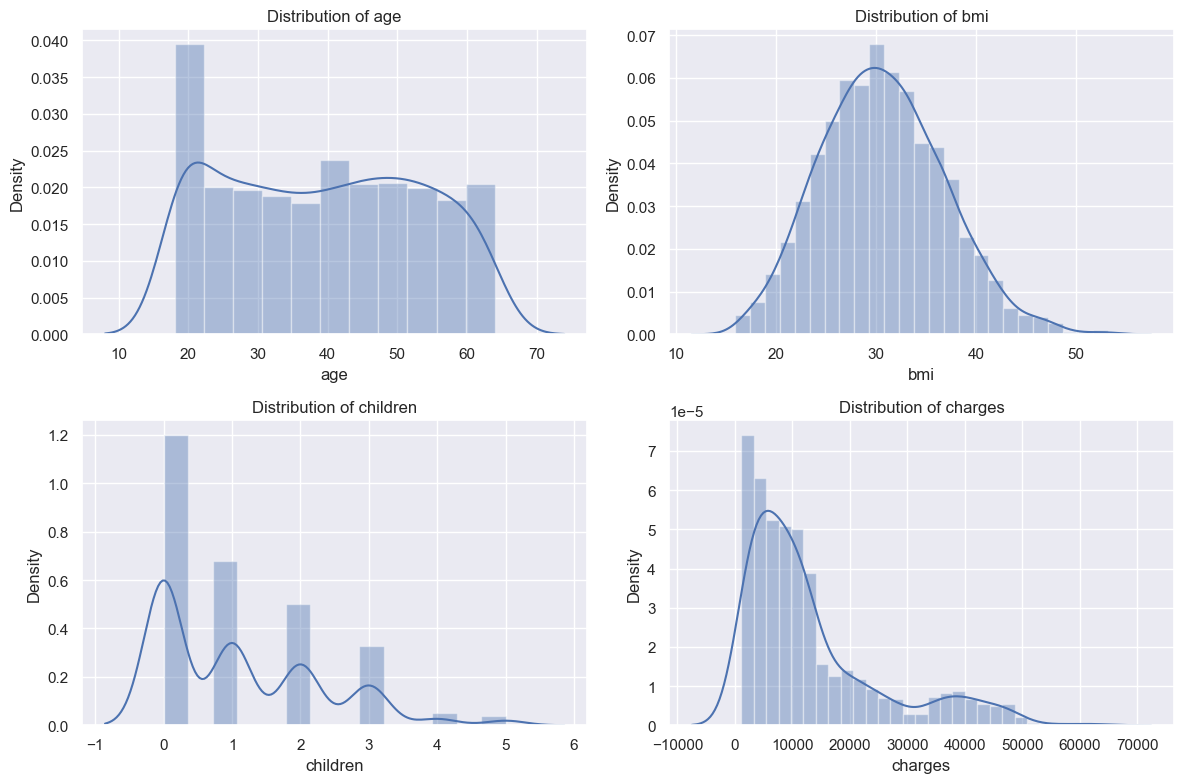

In [32]:
# lets visualize 
plt.figure(figsize=(12, 8))
p=1
for column in num_col:
    sns.set()
    # lets Adjust the subplot size within the figure
    plt.subplot(2,2,p)
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    p += 1
plt.tight_layout()
plt.show()

Correlation between target vs INdependent variable

In [35]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [37]:
#separating independent and target variables into x and y
x=df.drop('charges', axis=1)
y=df['charges']

print("Feature Dimension ", x.shape)
print("Label Dimension", y.shape)

Feature Dimension  (1337, 6)
Label Dimension (1337,)


In [39]:
#importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [52]:
#finding the best random state

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.25, random_state=20)
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))

    

ValueError: could not convert string to float: 'female'